<a href="https://colab.research.google.com/github/Jenny0229/PiazzaPost_Classification/blob/main/Multiclass_ExamProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import nltk
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import classification_report, accuracy_score, balanced_accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

In [ ]:
import gensim
from gensim.models import Word2Vec
from itertools import islice
import time

In [ ]:
file_path1 = "https://raw.githubusercontent.com/Jenny0229/PiazzaPost_Classification/main/sp16_projects_exam.csv?token=GHSAT0AAAAAACEAZTCJOMP4D7VO4WIQVXEKZGLXZMQ"
file1 = pd.read_csv(file_path1)
file_path2 = "https://raw.githubusercontent.com/Jenny0229/PiazzaPost_Classification/main/w16_projects_exam.csv?token=GHSAT0AAAAAACEAZTCJUNGUXUN5WTYB5BVQZGLXZ6Q"
file2 = pd.read_csv(file_path2)

In [ ]:
posts = pd.DataFrame()
posts = pd.concat([posts, file1], axis=0)
posts = pd.concat([posts, file2], axis=0)
posts.to_csv('merged_files.csv', index=False)

In [ ]:
posts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2884 entries, 0 to 2551
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   tag      2884 non-null   object
 1   content  2856 non-null   object
dtypes: object(2)
memory usage: 67.6+ KB


In [ ]:
posts.head()

tag                                            content
0   exam  final exam scores have been released and regra...
1   exam  this message contains details for the eecs 280...
2  image  if youve got your resize program working feel ...
3   exam  please do not discuss the exam until 400 today...
4   exam                  how is this 3 3 why is it not 2 1

In [ ]:
#posts = posts.dropna()
posts["content"].fillna("", inplace = True)

In [ ]:
posts["tag"].value_counts()

euchre        794
image         613
calculator    435
statistics    370
recursion     345
exam          327
Name: tag, dtype: int64

<Axes: >

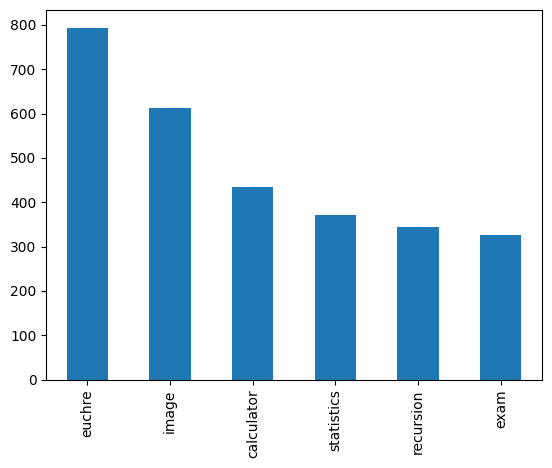

In [ ]:
posts["tag"].value_counts().plot(kind='bar')

In [ ]:
posts['content']=posts['content'].apply(str)

In [ ]:
posts['length'] = posts['content'].apply(len)

In [ ]:
print(posts.max(axis = 0))

tag                                               statistics
content    youre probably aware the autograders down agai...
length                                                  6259
dtype: object


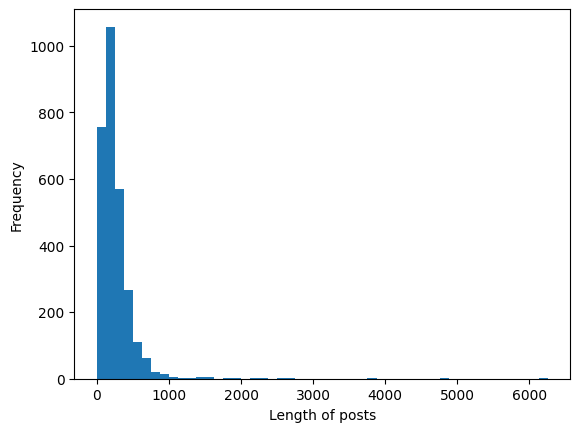

In [ ]:
posts['length'].plot.hist( bins=50)
plt.xlabel('Length of posts')
plt.rcParams['figure.figsize'] = [10, 8]
plt.show()

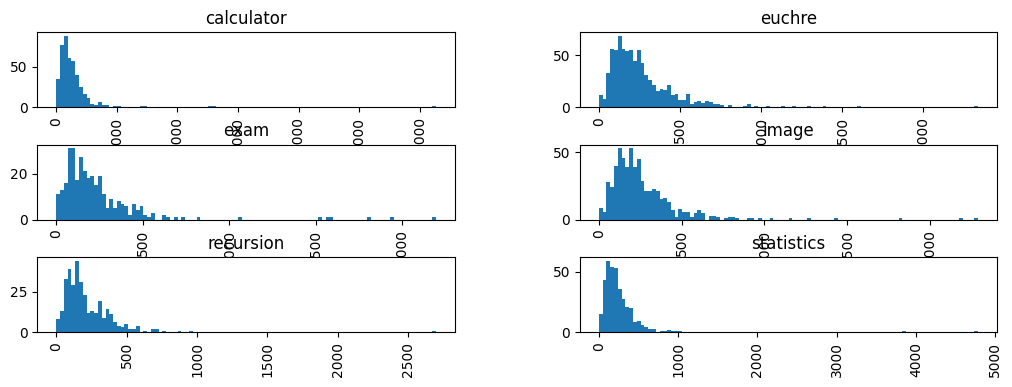

In [ ]:
posts.hist(column='length',by='tag', bins=100, figsize=(12,4))
plt.show()

In [ ]:
def show_wordcloud(df, title):
  text = ' '.join(df['content'].astype(str).tolist())
  word_cloud = WordCloud(width =520, height =260, stopwords=STOPWORDS, max_font_size=50, background_color ="black",
                          colormap='Blues').generate(text)
  plt.figure(figsize=(16,10))
  plt.imshow(word_cloud, interpolation='bilinear')
  plt.axis('off') # not display axis
  plt.show()

In [ ]:
data_euchre  = posts[posts['tag'] == "euchre"]
data_cal  = posts[posts['tag'] == "calculator"]
data_rec  = posts[posts['tag'] == "recursion"]
data_img  = posts[posts['tag'] == "image"]
data_stats  = posts[posts['tag'] == "statistics"]
data_exam  = posts[posts['tag'] == "exam"]

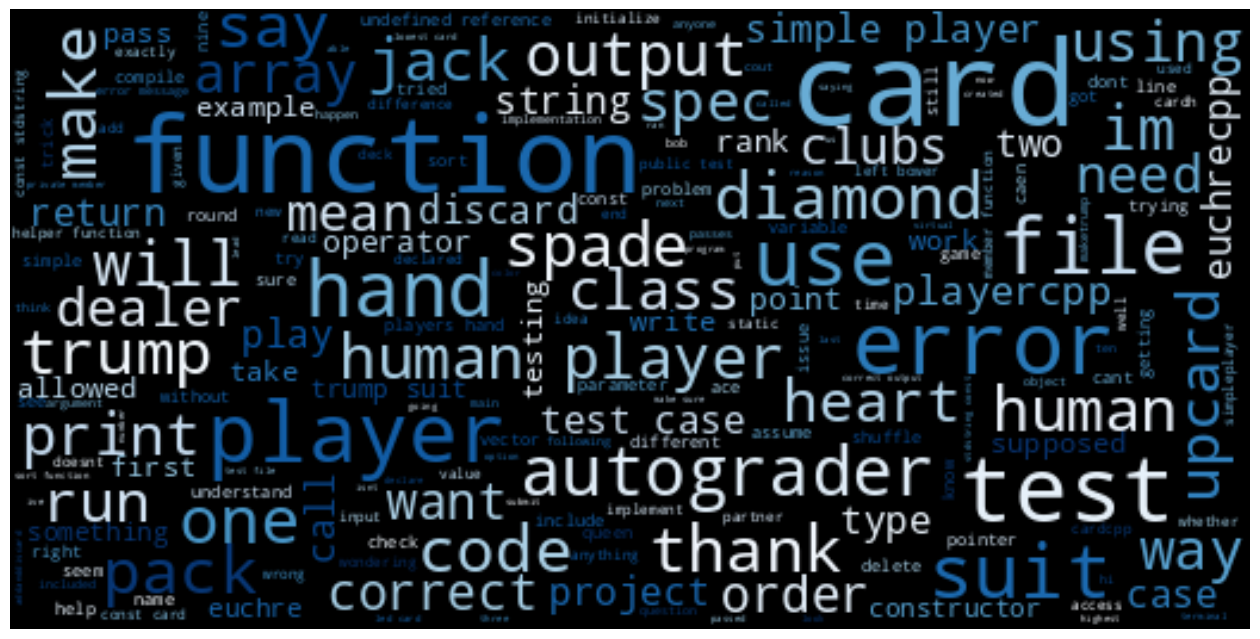

In [ ]:
show_wordcloud(data_euchre, "euchre posts")

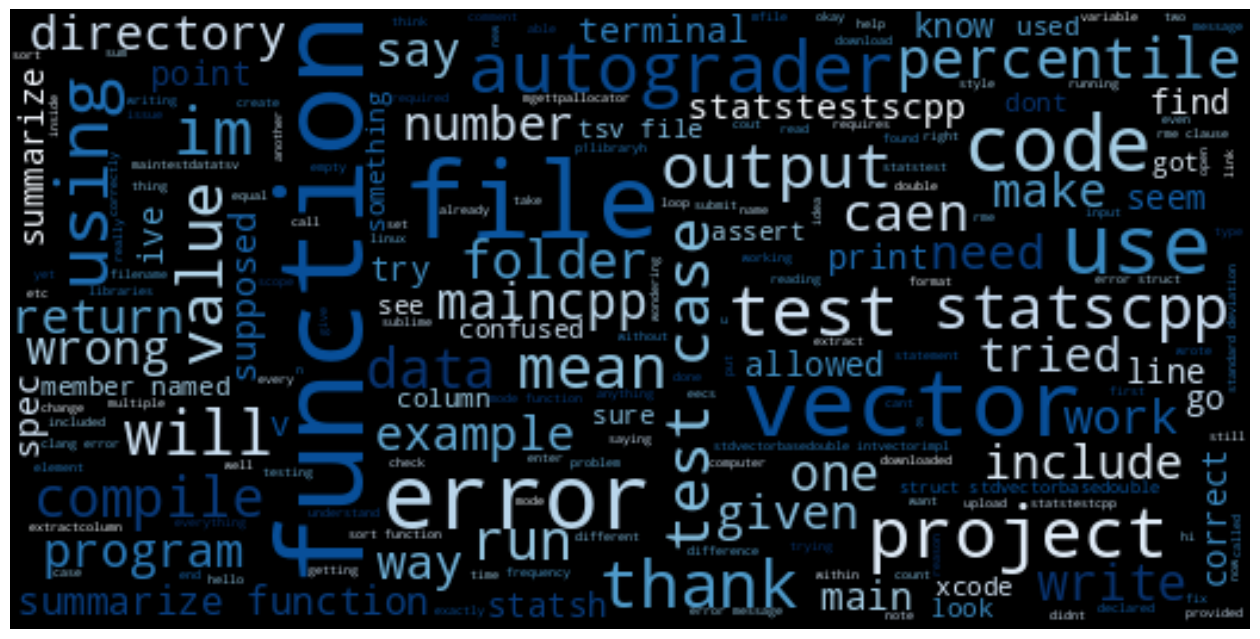

In [ ]:
show_wordcloud(data_stats, "stats posts")

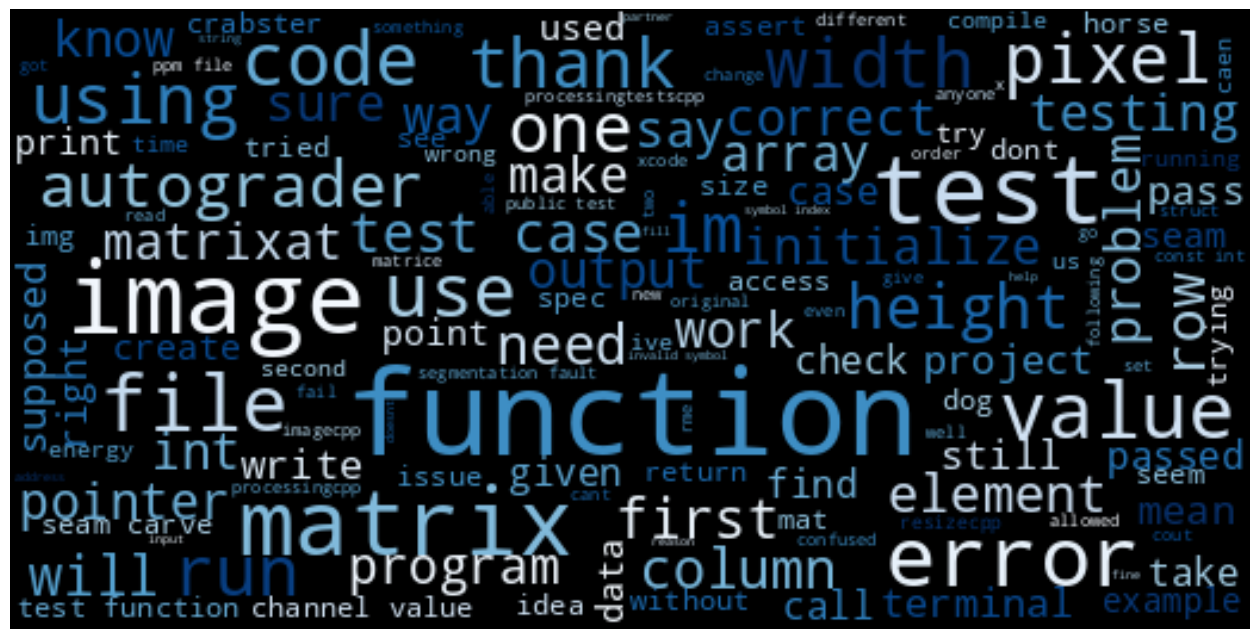

In [ ]:
show_wordcloud(data_img, "image posts")

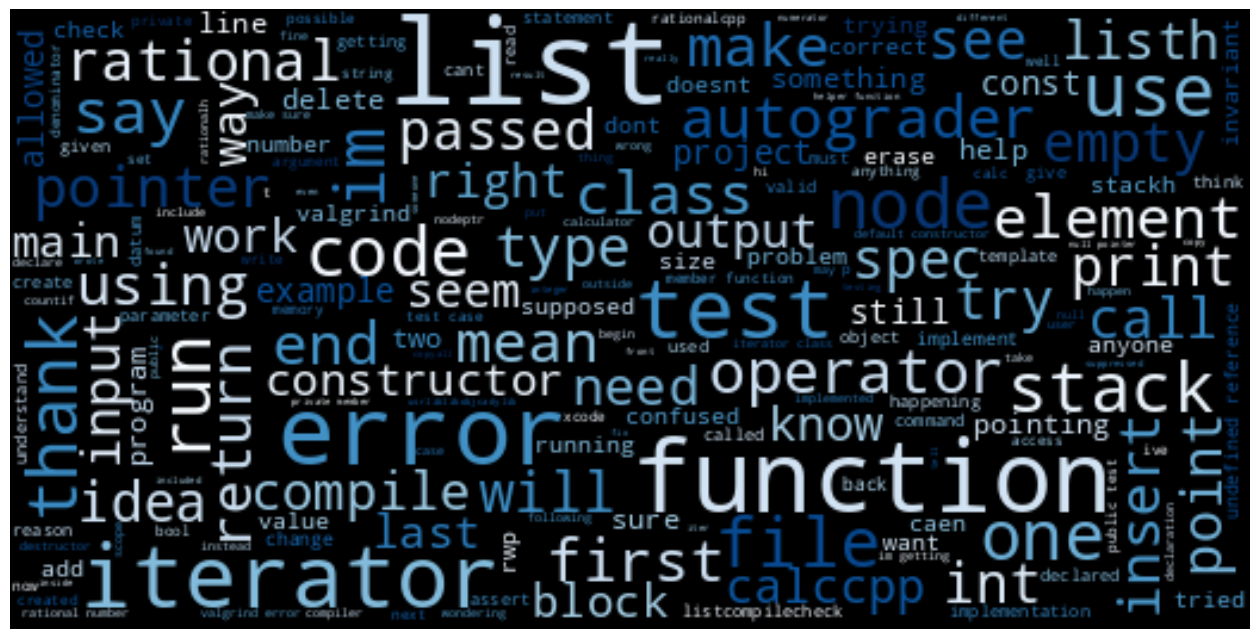

In [ ]:
show_wordcloud(data_cal, "calculator posts")

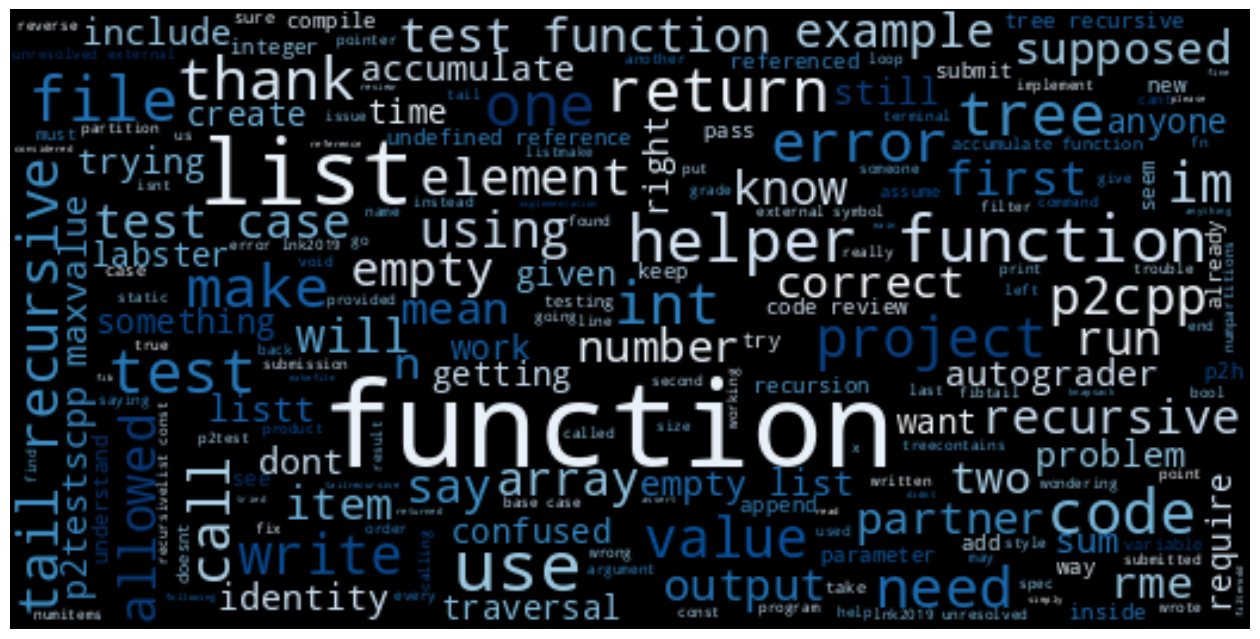

In [ ]:
show_wordcloud(data_rec, "recursion posts")

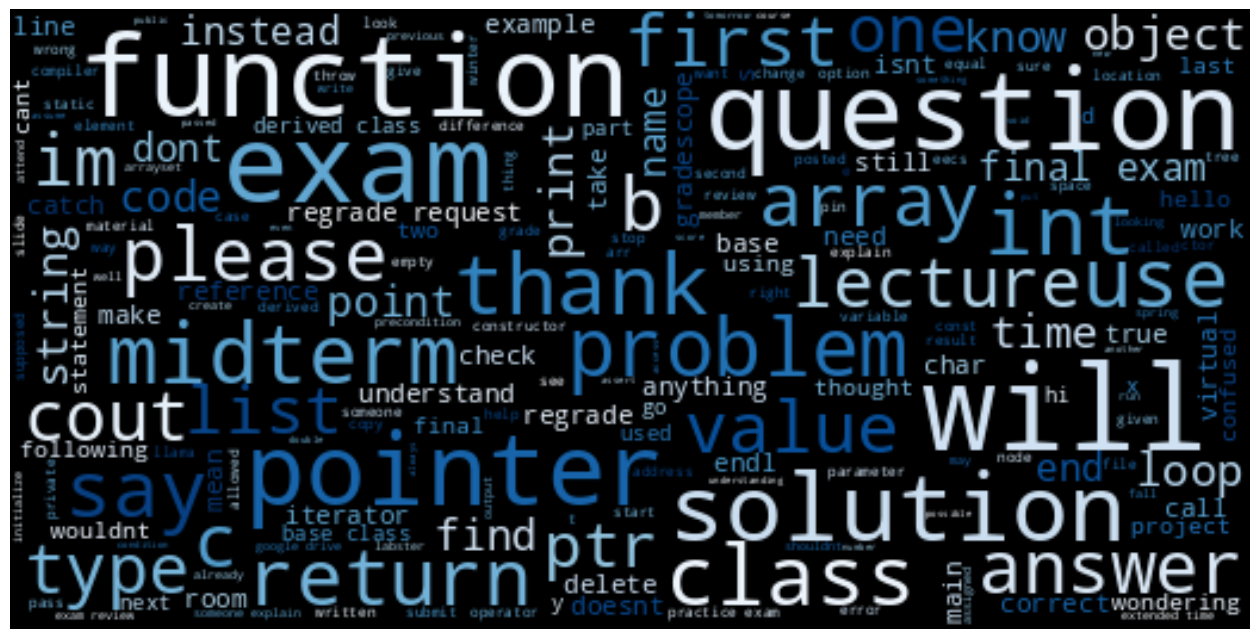

In [ ]:
show_wordcloud(data_exam, "exam posts")

In [ ]:
posts['tag'] = posts['tag'].map( {'exam': 0, 'statistics': 1, 'image': 2, 'euchre':3, 'recursion': 4, 'calculator': 5 })

In [ ]:
posts.head()

tag                                            content  length
0    0  final exam scores have been released and regra...     367
1    0  this message contains details for the eecs 280...    1580
2    2  if youve got your resize program working feel ...     104
3    0  please do not discuss the exam until 400 today...      56
4    0                  how is this 3 3 why is it not 2 1      33

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
def remove_stop_words(post):
  post_tokens = word_tokenize(post)
  #words = post.split()
  modified_words = [word for word in post_tokens if word not in stop_words]
  return ' '.join(modified_words)

In [ ]:
posts_processed = posts.copy()

In [ ]:
posts_processed['content'] = posts['content'].apply(remove_stop_words)

In [ ]:
ps = PorterStemmer()
posts_processed['content'] = posts_processed['content'].apply(lambda x: ' '.join(ps.stem(term) for term in x.split()))

In [ ]:
posts_processed['length'] = posts_processed['content'].apply(len)

In [ ]:
posts_processed.head()

tag                                            content  length
0    0  final exam score releas regrad request open pl...     216
1    0  messag contain detail eec 280 midterm 0 covera...    1038
2    2  youv got resiz program work feel free share re...      59
3    0                 pleas discuss exam 400 today thank      34
4    0                                            3 3 2 1       7

In [ ]:
X = posts_processed.content
y = posts_processed.tag
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [ ]:
nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

In [ ]:
scores = cross_val_score(nb, X_train, y_train, cv=10)

In [ ]:
mean_scores = scores.mean()

In [ ]:
print(mean_scores)

0.595650460568445


In [ ]:
pred_nb=nb.predict(X_test)

In [ ]:
print(classification_report(y_test, pred_nb))
print('-----------------------------------------')
print('Accuracy score: ',accuracy_score(y_test, pred_nb))
print('-----------------------------------------')
print('Balanced Accuracy score: ',balanced_accuracy_score(y_test, pred_nb))

              precision    recall  f1-score   support

           0       1.00      0.28      0.44       100
           1       1.00      0.37      0.54       116
           2       0.67      0.82      0.73       173
           3       0.48      0.94      0.64       240
           4       0.91      0.30      0.45       104
           5       0.81      0.47      0.60       133

    accuracy                           0.61       866
   macro avg       0.81      0.53      0.57       866
weighted avg       0.75      0.61      0.59       866

-----------------------------------------
Accuracy score:  0.6143187066974596
-----------------------------------------
Balanced Accuracy score:  0.5298577261960705


multinomial naive bayes model

In [ ]:
svm = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LinearSVC(loss='hinge', class_weight = 'balanced',random_state=42)),
               ])
svm.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf',
                 LinearSVC(class_weight='balanced', loss='hinge',
                           random_state=42))])

In [ ]:
scores = cross_val_score(svm, X_train, y_train, cv=5)

In [ ]:
mean_scores = scores.mean()

In [ ]:
print(mean_scores)

0.7651119082131539


In [ ]:
param_grid = [
{'clf__C': [0.1, 1, 5, 10, 20], 'clf__tol': [1e-5, 1e-4, 1e-3, 1e-2]}
]

In [ ]:
grid_search = GridSearchCV(svm, param_grid,
     cv=5, scoring='neg_mean_squared_error',
return_train_score=True)

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect', CountVectorizer()),
                                       ('tfidf', TfidfTransformer()),
                                       ('clf',
                                        LinearSVC(class_weight='balanced',
                                                  loss='hinge',
                                                  random_state=42))]),
             param_grid=[{'clf__C': [0.1, 1, 5, 10, 20],
                          'clf__tol': [1e-05, 0.0001, 0.001, 0.01]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
grid_search.best_params_

{'clf__C': 5, 'clf__tol': 1e-05}

In [ ]:
cvres = grid_search.cv_results_

In [ ]:
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(np.sqrt(-mean_score), params)

1.31751657953555 {'clf__C': 0.1, 'clf__tol': 1e-05}
1.31751657953555 {'clf__C': 0.1, 'clf__tol': 0.0001}
1.31751657953555 {'clf__C': 0.1, 'clf__tol': 0.001}
1.3126157945347559 {'clf__C': 0.1, 'clf__tol': 0.01}
1.3124356311642253 {'clf__C': 1, 'clf__tol': 1e-05}
1.3124356311642253 {'clf__C': 1, 'clf__tol': 0.0001}
1.3124356311642253 {'clf__C': 1, 'clf__tol': 0.001}
1.3111147697340555 {'clf__C': 1, 'clf__tol': 0.01}
1.3016523906264816 {'clf__C': 5, 'clf__tol': 1e-05}
1.3086788551514263 {'clf__C': 5, 'clf__tol': 0.0001}
1.3092461550202465 {'clf__C': 5, 'clf__tol': 0.001}
1.3092461550202465 {'clf__C': 5, 'clf__tol': 0.01}
1.332868093987116 {'clf__C': 10, 'clf__tol': 1e-05}
1.332868093987116 {'clf__C': 10, 'clf__tol': 0.0001}
1.3315675008929115 {'clf__C': 10, 'clf__tol': 0.001}
1.330627572566581 {'clf__C': 10, 'clf__tol': 0.01}
1.3582798706676413 {'clf__C': 20, 'clf__tol': 1e-05}
1.3535298639655993 {'clf__C': 20, 'clf__tol': 0.0001}
1.3677375809928463 {'clf__C': 20, 'clf__tol': 0.001}
1.357

In [ ]:
best_model = grid_search.best_estimator_

In [ ]:
best_model.score(X_test, y_test)

0.7702078521939953

In [ ]:
best_pred = best_model.predict(X_test)

In [ ]:
print(classification_report(y_test, best_pred))
print('-----------------------------------------')
print('Accuracy score: ',accuracy_score(y_test, best_pred))
print('-----------------------------------------')
print('Balanced Accuracy score: ',balanced_accuracy_score(y_test, best_pred))

              precision    recall  f1-score   support

           0       0.77      0.70      0.73       100
           1       0.75      0.80      0.77       116
           2       0.75      0.77      0.76       173
           3       0.84      0.82      0.83       240
           4       0.74      0.70      0.72       104
           5       0.72      0.76      0.74       133

    accuracy                           0.77       866
   macro avg       0.76      0.76      0.76       866
weighted avg       0.77      0.77      0.77       866

-----------------------------------------
Accuracy score:  0.7702078521939953
-----------------------------------------
Balanced Accuracy score:  0.7587775285992794


SVM classifier model

In [ ]:
LR = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5, class_weight = 'balanced', solver = 'newton-cg',multi_class = 'multinomial')),
               ])
LR.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf',
                 LogisticRegression(C=100000.0, class_weight='balanced',
                                    multi_class='multinomial', n_jobs=1,
                                    solver='newton-cg'))])

In [ ]:
scores = cross_val_score(svm, X_train, y_train, cv=5)

In [ ]:
mean_scores = scores.mean()

In [ ]:
print(mean_scores)

0.7651119082131539


In [ ]:
param_grid = [
{'clf__C': [0.1, 1, 5, 10, 20], 'clf__tol': [1e-5, 1e-4, 1e-3, 1e-2]}
]

In [ ]:
grid_search = GridSearchCV(LR, param_grid,
     cv=5, scoring='neg_mean_squared_error',
return_train_score=True)

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect', CountVectorizer()),
                                       ('tfidf', TfidfTransformer()),
                                       ('clf',
                                        LogisticRegression(C=100000.0,
                                                           class_weight='balanced',
                                                           multi_class='multinomial',
                                                           n_jobs=1,
                                                           solver='newton-cg'))]),
             param_grid=[{'clf__C': [0.1, 1, 5, 10, 20],
                          'clf__tol': [1e-05, 0.0001, 0.001, 0.01]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
grid_search.best_params_

{'clf__C': 5, 'clf__tol': 1e-05}

In [ ]:
best_model = grid_search.best_estimator_

In [ ]:
scores = cross_val_score(best_model, X_train, y_train, cv=5)

In [ ]:
mean_score = scores.mean()

In [ ]:
print(mean_score)

0.7626391175097658


In [ ]:
best_model.score(X_test, y_test)

0.7829099307159353

In [ ]:
pred_best=best_model.predict(X_test)

In [ ]:
print(classification_report(y_test, pred_LR))
print('-----------------------------------------')
print('Accuracy score: ',accuracy_score(y_test, pred_LR))
print('-----------------------------------------')
print('Balanced Accuracy score: ',balanced_accuracy_score(y_test, pred_LR))

              precision    recall  f1-score   support

           0       0.76      0.65      0.70       100
           1       0.78      0.78      0.78       116
           2       0.75      0.77      0.76       173
           3       0.82      0.83      0.82       240
           4       0.68      0.69      0.69       104
           5       0.70      0.72      0.71       133

    accuracy                           0.76       866
   macro avg       0.75      0.74      0.74       866
weighted avg       0.76      0.76      0.76       866

-----------------------------------------
Accuracy score:  0.7575057736720554
-----------------------------------------
Balanced Accuracy score:  0.7410912926734791


In [ ]:
posts['content_clean'] = posts['content'].apply(lambda x: gensim.utils.simple_preprocess(x))
posts.head()

tag                                            content  length  \
0    0  final exam scores have been released and regra...     367   
1    0  this message contains details for the eecs 280...    1580   
2    2  if youve got your resize program working feel ...     104   
3    0  please do not discuss the exam until 400 today...      56   
4    0                  how is this 3 3 why is it not 2 1      33   

                                          text_clean  \
0  [final, exam, scores, have, been, released, an...   
1  [this, message, contains, details, for, the, e...   
2  [if, youve, got, your, resize, program, workin...   
3  [please, do, not, discuss, the, exam, until, t...   
4                  [how, is, this, why, is, it, not]   

                                       content_clean  
0  [final, exam, scores, have, been, released, an...  
1  [this, message, contains, details, for, the, e...  
2  [if, youve, got, your, resize, program, workin...  
3  [please, do, not, discuss, the, exam, until, t...  
4                  [how, is, this, why, is, it, not]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split (posts['content_clean'], posts['tag'] , test_size=0.2)

In [ ]:
w2v_model = gensim.models.Word2Vec(X_train,
                                   vector_size=100,
                                   window=5,
                                   min_count=5,
                                   alpha=0.03,
                                   min_alpha=0.0007)

In [ ]:
w2v_model.wv.index_to_key

['the',
 'to',
 'in',
 'is',
 'and',
 'of',
 'it',
 'for',
 'we',
 'that',
 'this',
 'my',
 'function',
 'be',
 'if',
 'when',
 'but',
 'or',
 'have',
 'not',
 'are',
 'test',
 'on',
 'do',
 'error',
 'what',
 'as',
 'an',
 'with',
 'how',
 'can',
 'use',
 'so',
 'should',
 'functions',
 'would',
 'code',
 'you',
 'am',
 'im',
 'there',
 'file',
 'does',
 'just',
 'any',
 'all',
 'was',
 'list',
 'get',
 'will',
 'from',
 'one',
 'make',
 'at',
 'thanks',
 'card',
 'autograder',
 'using',
 'no',
 'our',
 'why',
 'player',
 'like',
 'const',
 'by',
 'then',
 'same',
 'output',
 'run',
 'tests',
 'project',
 'int',
 'know',
 'has',
 'first',
 'files',
 'me',
 'only',
 'need',
 'out',
 'because',
 'matrix',
 'class',
 'correct',
 'dont',
 'says',
 'value',
 'up',
 'could',
 'about',
 'case',
 'hand',
 'they',
 'its',
 'suit',
 'array',
 'getting',
 'return',
 'other',
 'image',
 'way',
 'mean',
 'into',
 'however',
 'line',
 'which',
 'print',
 'write',
 'sure',
 'also',
 'them',
 'some',

In [ ]:
w2v_model.wv.most_similar('euchre')

[('except', 0.9979959726333618),
 ('including', 0.997969925403595),
 ('made', 0.9978936910629272),
 ('creating', 0.9977700114250183),
 ('passes', 0.9976823925971985),
 ('included', 0.9976762533187866),
 ('version', 0.9976507425308228),
 ('several', 0.99764484167099),
 ('every', 0.9975091814994812),
 ('resizeexe', 0.9975048303604126)]

In [ ]:
w2v_model.wv.most_similar('king')

[('ace', 0.9984739422798157),
 ('queen', 0.9978399872779846),
 ('nine', 0.9974348545074463),
 ('clubs', 0.9968363046646118),
 ('ten', 0.9940367341041565),
 ('hearts', 0.994016170501709),
 ('spades', 0.9934685230255127),
 ('alices', 0.9925380945205688),
 ('round', 0.9915881156921387),
 ('play', 0.9904980659484863)]

In [ ]:
w2v_model.wv.most_similar('recursion')

[('another', 0.9977536797523499),
 ('more', 0.9977163672447205),
 ('loop', 0.9977020621299744),
 ('things', 0.9976922273635864),
 ('wouldnt', 0.9976612329483032),
 ('etc', 0.997372567653656),
 ('ie', 0.9973613619804382),
 ('parameters', 0.9973613023757935),
 ('delete', 0.9972889423370361),
 ('accumulate', 0.9972519874572754)]

In [ ]:
words = set(w2v_model.wv.index_to_key )
X_train_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in words])
                         for ls in X_train])
X_test_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in words])
                         for ls in X_test])

<ipython-input-68-b5f4a0d5af08>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_train_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in words])
<ipython-input-68-b5f4a0d5af08>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_test_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in words])


In [ ]:
for i, v in enumerate(X_train_vect):
    print(len(X_train.iloc[i]), len(v))

46 43
43 43
103 100
72 69
62 61
26 26
99 96
24 24
41 40
42 41
56 47
67 66
12 12
44 44
15 15
84 78
30 29
38 37
105 98
47 44
74 74
26 26
41 38
18 16
67 63
25 23
9 9
36 32
32 31
60 59
32 30
124 120
20 19
8 8
15 14
143 129
4 4
60 59
0 0
12 12
137 115
21 21
17 17
31 31
54 45
30 30
23 19
16 12
5 5
17 16
94 92
19 18
19 19
42 41
47 46
34 32
49 45
21 21
26 25
15 15
47 46
39 38
124 122
51 47
3 3
30 27
16 16
7 7
27 24
64 63
26 26
52 51
47 47
144 139
92 87
44 41
56 56
49 49
46 43
45 45
10 9
41 39
35 33
85 76
42 39
32 31
34 31
52 51
57 55
26 25
66 60
9 9
124 117
28 26
27 27
45 44
23 22
20 20
9 8
48 43
13 13
55 53
16 16
31 28
62 58
41 41
46 46
26 23
112 110
83 79
23 21
44 43
41 40
63 59
193 190
18 18
17 15
54 53
19 18
25 24
75 75
58 55
35 34
45 42
82 70
30 27
17 17
16 16
35 33
22 22
70 66
110 105
25 25
44 41
28 28
92 84
96 95
33 33
8 7
67 66
18 18
37 36
37 37
76 73
10 9
21 16
52 48
43 42
12 12
23 22
25 25
46 44
10 10
52 51
26 26
36 35
18 17
86 69
7 7
107 106
75 71
17 17
16 13
69 64
11 11
55 50
89 82

In [ ]:
X_train_vect_avg = []
for v in X_train_vect:
    if v.size:
        X_train_vect_avg.append(v.mean(axis=0))
    else:
        X_train_vect_avg.append(np.zeros(100, dtype=float))

X_test_vect_avg = []
for v in X_test_vect:
    if v.size:
        X_test_vect_avg.append(v.mean(axis=0))
    else:
        X_test_vect_avg.append(np.zeros(100, dtype=float))

In [ ]:
for i, v in enumerate(X_train_vect_avg):
    print(len(X_train.iloc[i]), len(v))

46 100
43 100
103 100
72 100
62 100
26 100
99 100
24 100
41 100
42 100
56 100
67 100
12 100
44 100
15 100
84 100
30 100
38 100
105 100
47 100
74 100
26 100
41 100
18 100
67 100
25 100
9 100
36 100
32 100
60 100
32 100
124 100
20 100
8 100
15 100
143 100
4 100
60 100
0 100
12 100
137 100
21 100
17 100
31 100
54 100
30 100
23 100
16 100
5 100
17 100
94 100
19 100
19 100
42 100
47 100
34 100
49 100
21 100
26 100
15 100
47 100
39 100
124 100
51 100
3 100
30 100
16 100
7 100
27 100
64 100
26 100
52 100
47 100
144 100
92 100
44 100
56 100
49 100
46 100
45 100
10 100
41 100
35 100
85 100
42 100
32 100
34 100
52 100
57 100
26 100
66 100
9 100
124 100
28 100
27 100
45 100
23 100
20 100
9 100
48 100
13 100
55 100
16 100
31 100
62 100
41 100
46 100
26 100
112 100
83 100
23 100
44 100
41 100
63 100
193 100
18 100
17 100
54 100
19 100
25 100
75 100
58 100
35 100
45 100
82 100
30 100
17 100
16 100
35 100
22 100
70 100
110 100
25 100
44 100
28 100
92 100
96 100
33 100
8 100
67 100
18 100
37 100
37 10

In [ ]:
my_tags = ['exam', 'statistics', 'image', 'euchre', 'recursion', 'calculator']
logreg = LogisticRegression(n_jobs=1, class_weight = 'balanced', solver = 'newton-cg',multi_class = 'multinomial')
logreg = logreg.fit(X_train_vect_avg, y_train)

In [ ]:
y_pred = logreg.predict(X_test_vect_avg)

In [ ]:
print(classification_report(y_test, y_pred))
print('-----------------------------------------')
print('Accuracy score: ',accuracy_score(y_test, y_pred))
print('-----------------------------------------')
print('Balanced Accuracy score: ',balanced_accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.18      0.54      0.27        50
           1       0.20      0.33      0.25        70
           2       0.46      0.18      0.26       119
           3       0.71      0.50      0.59       167
           4       0.16      0.17      0.16        77
           5       0.18      0.12      0.14        94

    accuracy                           0.31       577
   macro avg       0.31      0.31      0.28       577
weighted avg       0.39      0.31      0.32       577

-----------------------------------------
Accuracy score:  0.3119584055459272
-----------------------------------------
Balanced Accuracy score:  0.30704863925903697


the performance is rather poor perhaps because my dataset is too small to effectively train a neural network model